# Introduction

- Every year 703 000 people take their own life and there are many more people who attempt suicide. Every suicide is a tragedy that affects families, communities and entire countries and has long-lasting effects on the people left behind.
- Suicide does not just occur in high-income countries, but is a global phenomenon in all regions of the world. In fact, over 77% of global suicides occurred in low- and middle-income countries.
- Suicide is a serious public health problem; however, suicides are preventable with timely, evidence-based and often low-cost interventions. For national responses to be effective, a comprehensive multisectoral suicide prevention strategy is needed.
#### As a result, we will work on this project to conduct an analysis in order to obtain real statistics and understand the reasons for these statistics, as well as to add our comments and recommendations to help reduce the world's suicide rate.


- Dataset source Link

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016



## Import the required Libraries 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 1: Load and Read the used Dataset

In [3]:
df=pd.read_csv("master.csv")
df.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
df.columns = ['country', 'year', 'sex', 'age', 'suicide_number', 'population', 'suicide_rate', 'country_year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicide_number', 'population',
       'suicide_rate', 'country_year', 'HDI_for_year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

# Step 2: Extract the basic information from the Dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicide_number  27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country_year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
df.shape

(27820, 12)

We discovered that the HDI for year column has nearly no data, therefore if we don't utilise it, we'll delete it. All other columns are complete and have no Null values. 

In [9]:
df.sex.value_counts()

male      13910
female    13910
Name: sex, dtype: int64

Gender data is full, but it will need to be encoded before it can be used in a predictive model. 

In [10]:
df.age.value_counts()

75+ years      4642
55-74 years    4642
35-54 years    4642
15-24 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

Age is divided into six groups, starting with 5-14 and ending with +75, but we will also need to encode it. 

In [11]:
df.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

We discovered that Generation X was repeated more frequently than the others, and Generation Z was the least frequently repeated.
So we can assume that Generation X has the highest suicide rate and Generation Z has the lowest, although this isn't proved.

and we can use the analysis to test our hypothesis 
We also will need to encode generation column

Check the number of countries that have shared their data in this dataset to see if it is useful information. 

In [12]:
counties_sharing = df.country.unique()
print("Number of countries:", len(counties_sharing))

Number of countries: 101


We discovered that the sharing counties are 101 out of 195, thus I believe we will have a decent idea for our topic. 

## Step 3: Analyze and Visualize

## The Difference Between Male and Female Suicide Rates

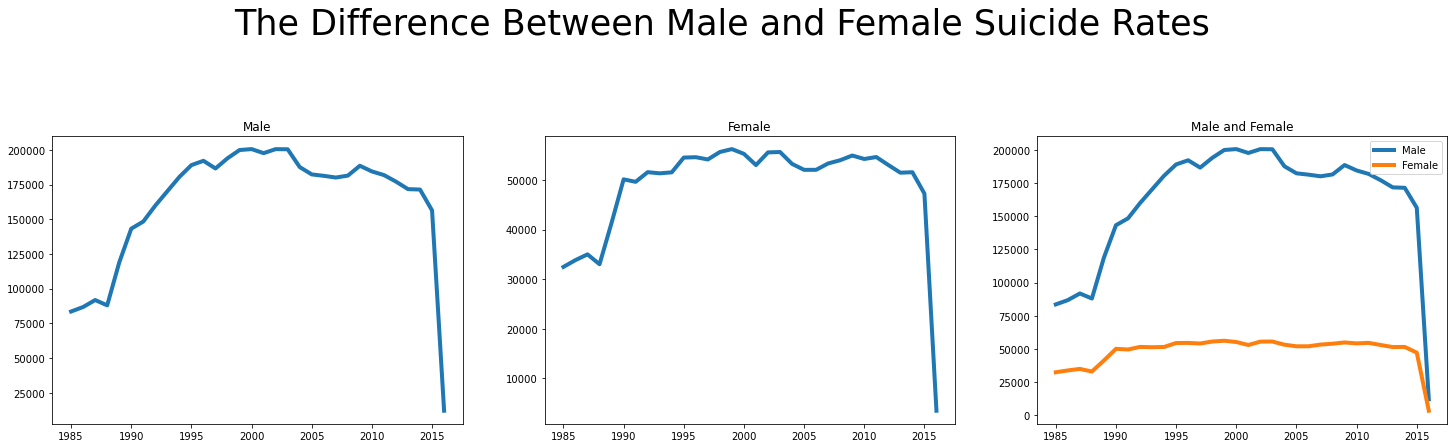

In [13]:
df_men = df[df.sex == 'male']
df_women = df[df.sex == 'female']
plt.figure(figsize=(25,18))
ax1 = plt.subplot(331)
ax1.title.set_text('Male')
plt.plot(df_men[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
ax2 = plt.subplot(332)
ax2.title.set_text('Female')
plt.plot(df_women[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
ax3 = plt.subplot(333)
ax3.title.set_text('Male and Female')
plt.plot(df_men[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_women[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.legend(["Male","Female"])
plt.suptitle('The Difference Between Male and Female Suicide Rates ', fontsize=35)
plt.show()

#### We discovered from the graphs that: 
####    1-Observation Number 1 is Suicide Male numbers are higher than female numbers regardless of age

##### Our opinion is The suicide rate of males is higher than females due to:
- Method lethality: 

Despite the suicide rate being higher in men, women typically have higher rates of suicidal ideation and behaviour than men (Cantor, 2000). The difference, therefore, seems to lie in mortality rates, which are lower in women than in men, suggesting that the difference may be in either intent or in the lethality of the method used (Canetto & Sakinofsky, 1998).Intent is generally not considered to be the reason for this discrepancy: although Rich et al., (1988) used psychological autopsy data to suggest that women are less intent on dying than men,corroborated this finding. Furthermore, Beautrais et al. (1996) found that the proportion of males and females who made a medically serious attempt was almost equal, but that twice as many women used non-violent methods. This suggests that the difference in suicide mortality rates between males and females is a result of method choice, rather than intent.

This difference in method choice is strongly supported by statistical evidence; Denning et al. (2000) stated that women use methods such as drug overdose and carbon monoxide poisoning, while men tend to use firearms and hanging.

Male suicide methods are often more violent, making them more likely to be completed before anyone can intervene.

- Depression (help seeking):

This suggests that the gender difference lies in help-seeking rather than in rates of depression itself, a premise supported by consistent reports that help-seeking behaviours for mental illness are less common in men than in women, even when experiencing similar levels of distress (Kessler, Brown, and Broman, 1981). Rickwood and Braithwaite (1994) noted that gender is one of the most consistent predictors of help-seeking behaviour, and research shows that men are more likely to agree that they would not seek professional therapy for depression or even seek help from their friends (Padesky & Hammen, 1981).

This could explain the discrepancy in suicide rates between males and females, as helping results in treatment, which is generally accepted as being more likely to alleviate depression than no treatment at all. Hence, men who do not seek help for depression are likely to suffer more severely due to a lack of treatment, which could result in an increased risk of suicide.

- Responsibility: 

This factor can be related to family or work. When there's an economic downturn that results in increased unemployment, for example, there tends to be an associated increase in suicides, typically 18–24 months after the downturn. One 2015 study found that for every 1% increase in unemployment, there was a 0.79% increase in the suicide rate.

Having to worry more about finances or trying to find a job can exacerbate mental health issues for anyone. But there are elements of social pressure and identity crisis, too.
##### Our Recommendation is :
- Communication: 
It’s too simplistic to say women are willing to share their problems and men tend to bottle them up. But it is true that, for generations, many societies have encouraged men to be "strong" and not admit they’re struggling.

It often starts in childhood. "We tell boys that 'boys don't cry'," says Colman O’Driscoll, former executive director of operations and development at Lifeline, an Australian charity providing 24-hour crisis support and suicide prevention services. "We condition boys from a very young age to not express emotions, because to express emotions is to be "weak."

Mara Grunau, executive director at the Centre for Suicide Prevention in Canada, points out that it’s how we talk to our children and how we encourage them to communicate about themselves too: "Mothers talk way more to their daughters than to their sons... and they share and identify feelings more," she says. "We almost expect women to be emotional."

- Artificial intelligence (AI): 

Technology is presenting new options too. Not everyone might want to burden themselves with another person's problems, even over a helpline. But artificial intelligence – such as chatbots – might allow a vulnerable person to communicate and get the help they need without fear of judgement.

- Awareness Campaign: 

Another strategy is to focus on the impact that a suicide has on loved ones. Calm’s campaign, Project 84, so named to represent the 84 men who die each week by suicide in the UK, stresses the devastation left behind. This can counteract the sense by some men that "it's the ‘right’ thing to take themselves out of the equation," Gunning says. He emphasises: "Staying is always an option."

- Non-Violence: 

Other solutions have to do with simply making suicides more difficult to complete. After barriers were installed on the Clifton suspension bridge in Bristol, England,
#### 2-Observation number 2 is that the male and female suicide rates began to fall in 2005 and reached a low point in 2016.

## The Suicide Rates and Group Age Relationship 

In [14]:
df.age.value_counts()

75+ years      4642
55-74 years    4642
35-54 years    4642
15-24 years    4642
25-34 years    4642
5-14 years     4610
Name: age, dtype: int64

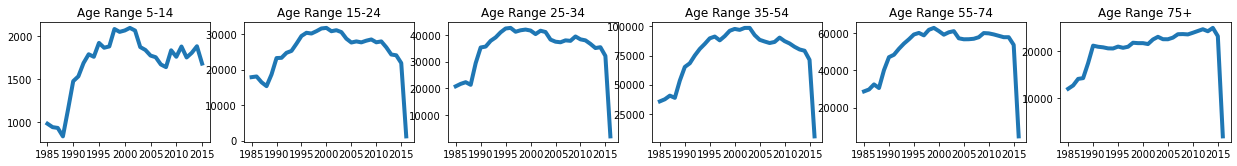

In [15]:
df_age_5_14 = df[df.age == '5-14 years']
df_age_15_24 = df[df.age == '15-24 years']
df_age_25_34 = df[df.age == '25-34 years']
df_age_35_54 = df[df.age == '35-54 years']
df_age_55_74 = df[df.age == '55-74 years']
df_age_75 = df[df.age == '75+ years']

plt.figure(figsize=(25,18))
ax1= plt.subplot(771)
ax1.title.set_text('Age Range 5-14')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_age_5_14[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax2 = plt.subplot(772)
ax2.title.set_text('Age Range 15-24')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_age_15_24[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax3 = plt.subplot(773)
ax3.title.set_text('Age Range 25-34')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_age_25_34[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax4 = plt.subplot(774)
ax4.title.set_text('Age Range 35-54')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_age_35_54[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
#####################
ax5 = plt.subplot(775)
ax5.title.set_text('Age Range 55-74')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_age_55_74[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax6 = plt.subplot(776)
ax6.title.set_text('Age Range 75+')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_age_75[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
#####################

plt.show()

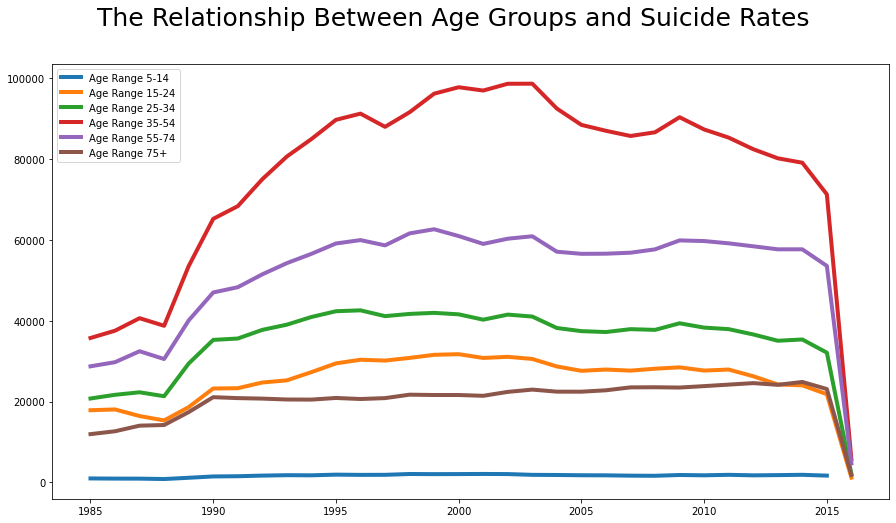

In [16]:
plt.figure(figsize=(15,8))
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_age_5_14[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_age_15_24[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_age_25_34[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_age_35_54[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_age_55_74[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_age_75[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)

plt.legend(["Age Range 5-14","Age Range 15-24","Age Range 25-34","Age Range 35-54","Age Range 55-74","Age Range 75+"])
plt.suptitle('The Relationship Between Age Groups and Suicide Rates ', fontsize=25)
plt.show()

In [17]:
x1=df.groupby('age', as_index=False)['suicide_number'].sum().sort_values(by='suicide_number', ascending=True)
x1.head(6)

,age,suicide_number
3,5-14 years,52264
5,75+ years,653118
0,15-24 years,808542
1,25-34 years,1123912
4,55-74 years,1658443
2,35-54 years,2452141


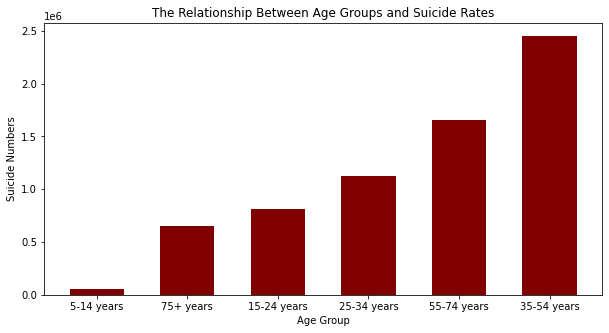

In [18]:
x=x1['age']
y=x1['suicide_number']
plt.figure(figsize=(10,5))
plt.bar(x,y,color ='maroon',width = 0.6)
plt.xlabel('Age Group')
plt.ylabel('Suicide Numbers')
plt.title('The Relationship Between Age Groups and Suicide Rates')
plt.show()

#### We discovered from the graphs that: 
#### 1-Observation Number 1 is the highest Suicide rate in age range 35-54 and then 55-74 and then 25-34
##### Our opinion is Young adults aged 18 to 25 are at higher risk for suicidal thoughts and attempts than other age groups. However, adults aged 35 to 64 have higher rates of death from suicide than other age groups due to:

(i) Older adults tend to plan suicide more carefully. They are also more likely to use more lethal methods.

(ii) Grief over lost loved ones

(iii) Chronic illness and pain

(iv) Cognitive impairment

(v) Financial troubles 

##### Our Recommendation is :
The National Suicide Prevention Lifeline outlines five action steps you can take if you know an older adult who is thinking about suicide.

(i) Ask: Don’t be afraid to be direct with the person at risk. Ask questions like, "Are you thinking about suicide?" and "How can I help you?" to initiate a conversation in a supportive and unbiased way. Be sure to listen carefully to their answers and acknowledge their emotional pain.

(ii)Be there: If you’re able to, be physically present for the person in order to ease feelings of isolation and provide a sense of connectedness. If a face-to-face visit is not possible, be there for them via phone or video call. Work with the individual to identify others who may be willing to lend their help. Be sure not to make any promises that you are unable to keep. 

(iii) Keep them safe: Find out if the person has already made any attempts on their life. Do they have a specific plan or timing in mind? Do they have access to their planned method of self-harm? Learning the answers to these questions can help you understand whether this individual is in immediate danger. In general, the more detailed a person’s suicide plan is, the higher their risk.

(iv) Help them connect: If someone in your life is thinking about suicide, it’s important for them to establish a support system they can rely on now and in future moments of crisis.

(v) Follow up: Studies have shown that following up can reduce suicide-related deaths in high-risk populations. Once you've had an initial conversation with the vulnerable person and helped them establish a support network, make sure to check in. This can be done with a quick phone call, text message, or even a card.

#### 2-Observation Number 2 is the lowest Suicide rate in age range 5-14 and then +75 and then 15-24
##### Our opinion is :
Suicide around the age of 5 is hard to find due to the fact that they don't have responsibilities or reasons to take their life. Suicide within this age range can be caused by childhood violence, mental disorders, sexual harassment, etc. Most literature (including this mini review) on youth suicide refers to school-age children (7–12 years) and adolescents (13–20 years). These young people are by nature vulnerable to mental health problems, especially during the years of adolescence (13). This period in life is characterised by movement, changes, and transitions from one state into another, in several domains at the same time. Young people have to make decisions about important concrete directions in life, for example, school, living situation, peer group.
For older adults (75+), sucide is low among them. Sucide can only occur and be caused by loliness, illness, sickness, etc.
Other more transient factors that reflect an imminent risk of suicide crisis include unbearable mental pain and related experiences of depression and hopelessness, which may lead to a suicidal state of mind.

##### Our Recommendation is :
They must address new challenges with regard to building their own identity, developing self-esteem, acquiring increasing independence and responsibility, and building new love.
More awareness, care, and love given to adults 75+

#### 3-Observation Number 3 suicide rate decreased quickly after 2015
##### Our opinion is : 
Over the 20-year period (1996–2015), there was a statistically significant decrease in the rate of suicide (22.3%) decrease, from 14.2 per 100,000 in 1996 to 11.0 per 100,000 in 2015).
    

## The Suicide Rates and Generation Relationship

In [19]:
generation =  df.groupby('generation', as_index=False)['suicide_number'].sum().sort_values(by='suicide_number', ascending=True)
generation 

,generation,suicide_number
3,Generation Z,15906
1,G.I. Generation,510009
4,Millenials,623459
2,Generation X,1532804
5,Silent,1781744
0,Boomers,2284498


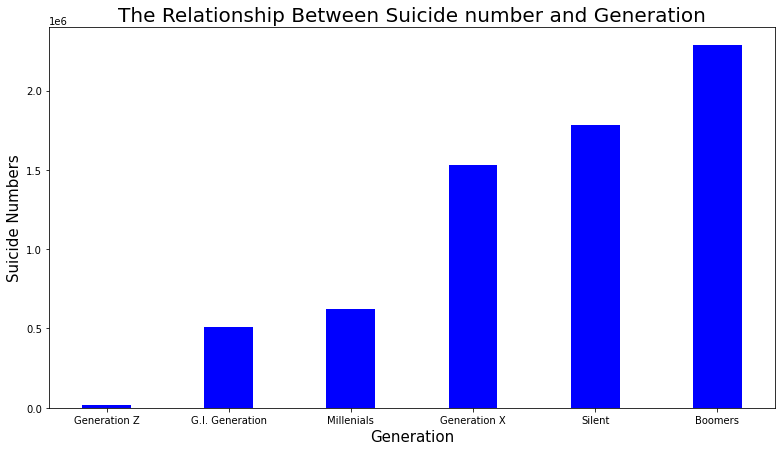

In [20]:
x1=generation['generation']
y1=generation['suicide_number']
plt.figure(figsize=(13,7))
plt.bar(x1,y1,color ='blue',width = 0.4)
plt.xlabel('Generation', fontsize=15)
plt.ylabel('Suicide Numbers', fontsize=15)
plt.title('The Relationship Between Suicide number and Generation', fontsize=20)
plt.show()

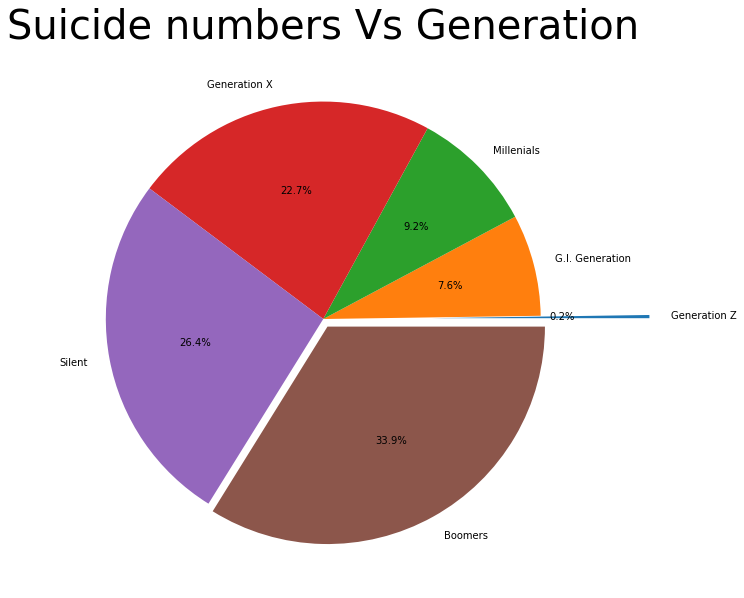

In [21]:
plt.figure(figsize=(10,10))
plt.title('Suicide numbers Vs Generation', fontsize=40)
plt.pie(generation.suicide_number, explode =(0.5, 0, 0, 0, 0, 0.04), labels=generation.generation, autopct='%1.1f%%')
plt.show()

#### We found from the Above graphs That the Boomers generation has the highest suicide rate 33.9%, and the Generation Z has the lowest suicide rate 0.2%.

##### Our opinion is : 

- Boomers

It has long held true that elderly people have higher suicide rates than the overall population. The Boomers had higher suicide rates than earlier generations; the confluence of that with the fact that they are now beginning to grow old, when the risk traditionally goes up is worrisome.

How did a generation that started out with so much going for it end up so despondent in midlife? It could be that those very advantages made it harder to cope with setbacks, said Barry Jacobs, director of behavioural sciences at the Crozer-Keystone Family Medicine Residency Program in Pennsylvania.

"There was an illusion of choice" — where people thought they’d be able to re-create themselves again and again, he said. "These people feel a greater sense of disappointment because their expectations of leading glorious lives didn’t come to fruition."

Instead, compared with their parents’ generation, boomers have higher rates of obesity, prescription and illicit drug abuse, alcoholism, divorce, depression, and mental disorders. As they age, many add to that list of chronic illness, disabilities, and the strains of caring for their parents and for adult children who still depend on them financially. Boomers have struggled more with existential questions of purpose and meaning.

- Generation Z

Generation Z has the lowest suicide rate because they are young and have fewer responsibilities and disappointments in life. Although Generation Z has the highest depression rate and mental instability,

According to a report, Generation Z (which is the current generation) is significantly more likely (about 27%) than other generations to report their mental health as poor. However, at the same time, they are 37% more likely to receive mental health treatment compared to other generations, reducing the attempts at suicide.
##### Our Recommendation is :
- Technology

Technology has developed a way to reduce and dictate sucide treats through the use of a machine learning model that would help us find out the chances of a particular individual resorting to suicide in the future.

- Communication

These factors can be used to help both generations avoid attempting and also reduce the rate of attempts in society. To help individuals dealing with the thought of suicide.

## The Suicide Rates and Countries Relationship

In [22]:
Countries =  df.groupby('country', as_index=False)['suicide_number'].sum().sort_values(by='suicide_number', ascending=True)
Countries 

,country,suicide_number
27,Dominica,0
76,Saint Kitts and Nevis,0
79,San Marino,4
1,Antigua and Barbuda,11
55,Maldives,20
...,...,...
95,Ukraine,319950
33,France,329127
46,Japan,806902
98,United States,1034013


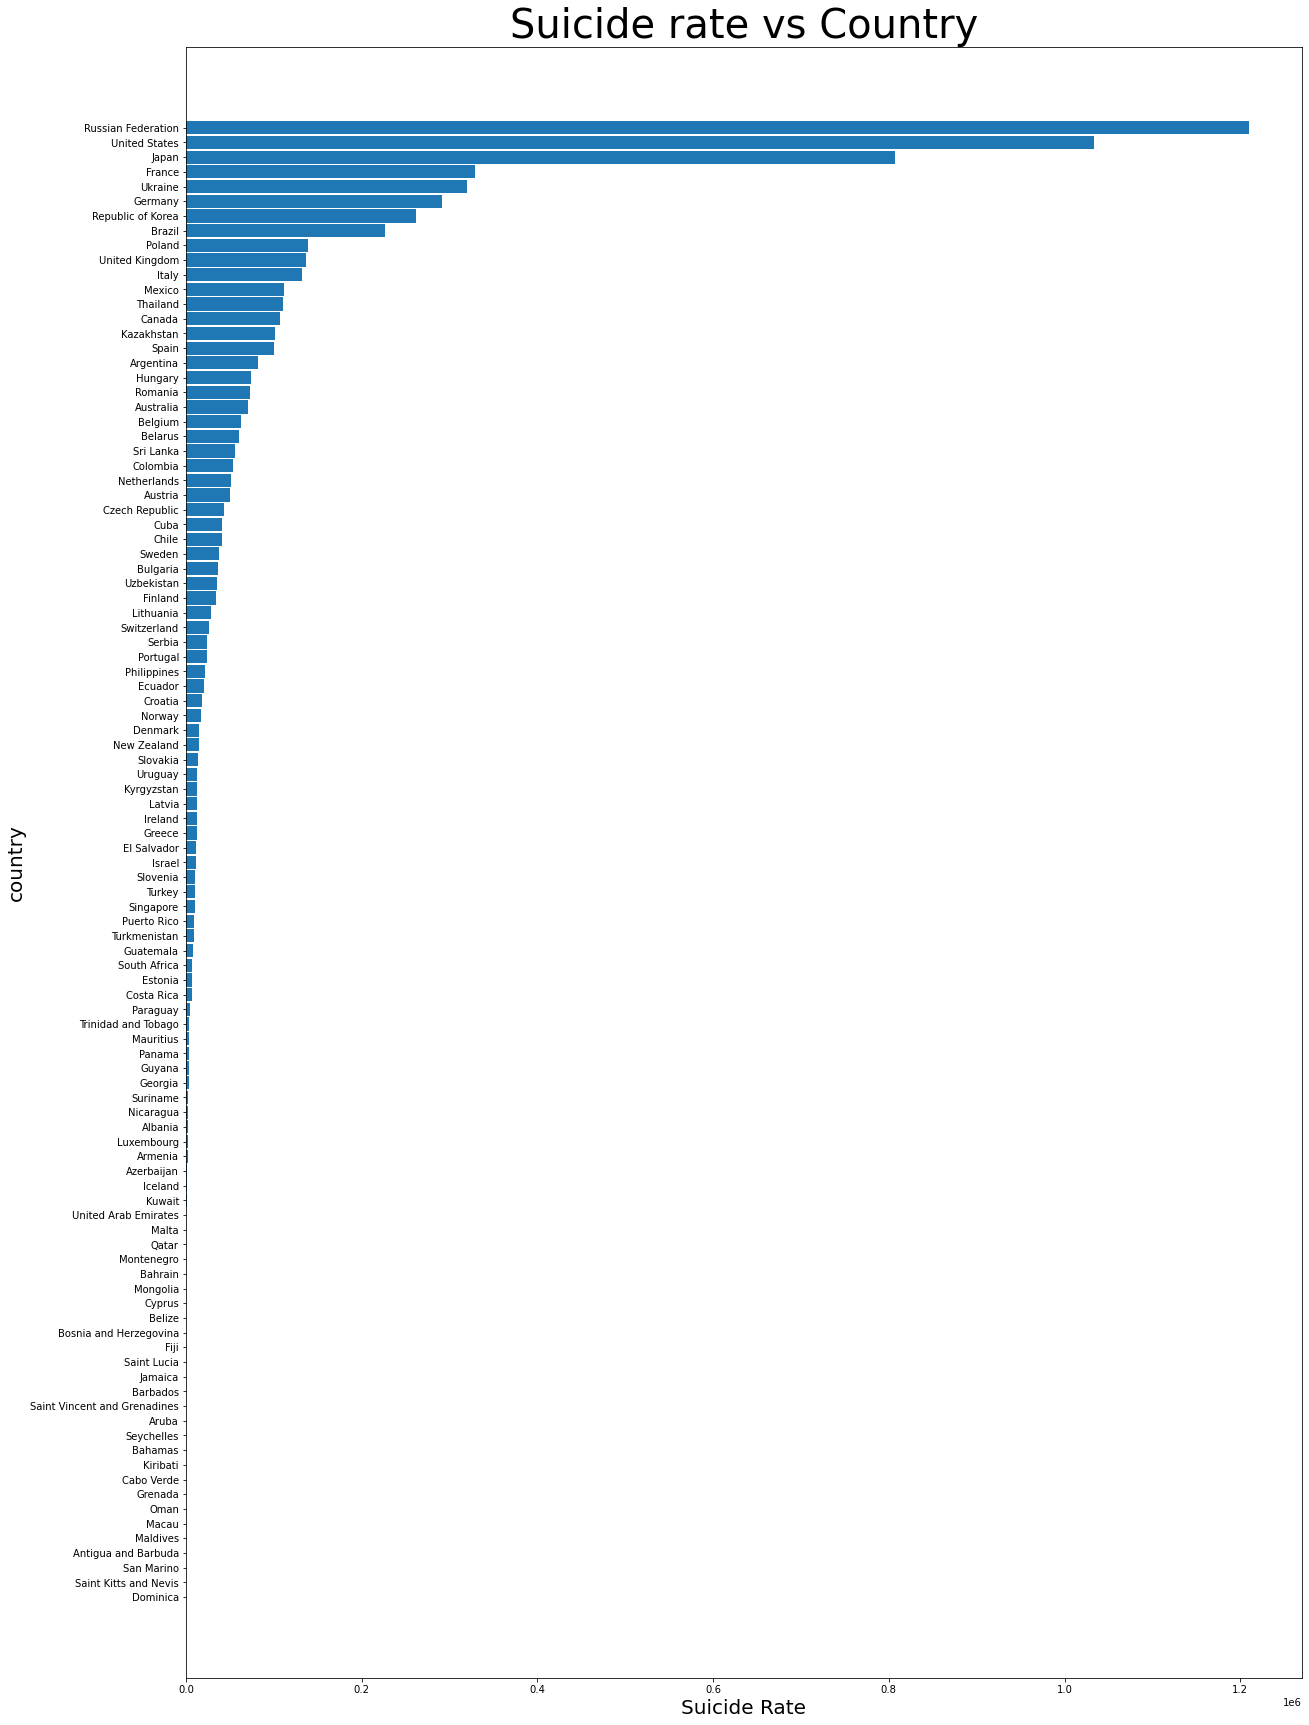

In [23]:
x2=Countries['country']
y2=Countries['suicide_number']
plt.figure(figsize=(20,30))
plt.barh(x2,y2,height=0.9)
plt.title('Suicide rate vs Country', fontsize=40)
plt.xlabel("Suicide Rate", fontsize=20)
plt.ylabel("country", fontsize=20)
plt.show()

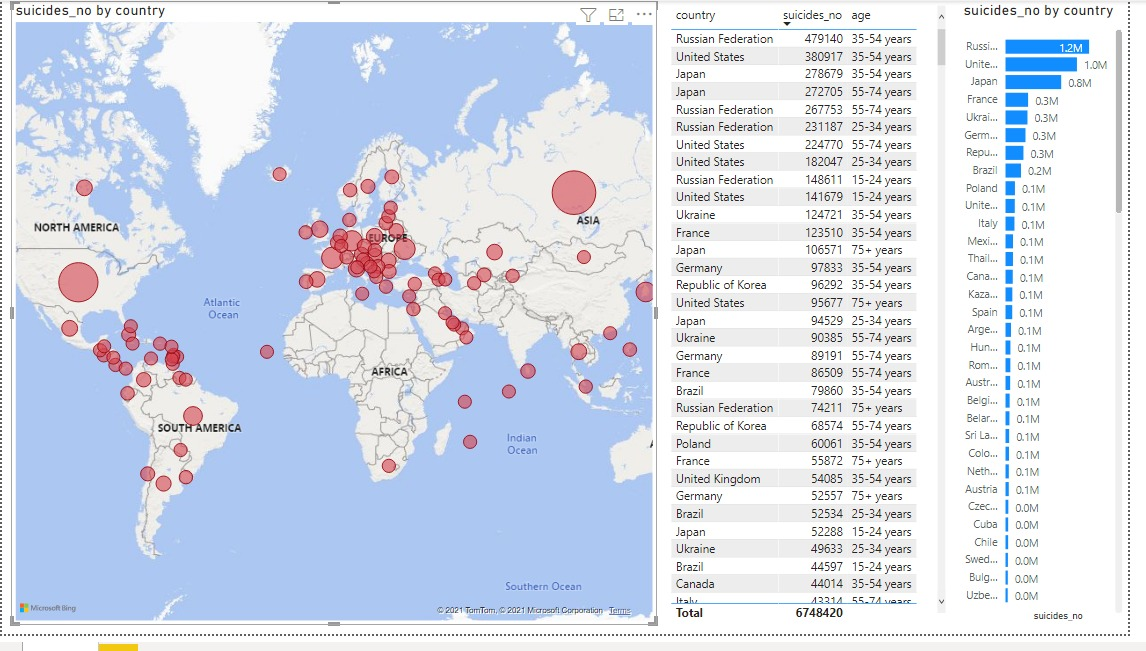

#### According to the graph, the four countries with the highest suicide rates are: [Russian Federation,United States,Japan,France]
##### Our opinion is : The suicide rate in these countries are high because of

- Financial pressure
- Isolating technology
- Historical practices

##### Our Recommendation is to reduce the rate of these factors.

#### And the bottom four countries are as follows: [Dominica,Saint Kitts and Nevis,San Marino,Antigua and Barbuda]
##### Our opinion is :

- These countries have lower suicide rates because they have less financial pressure, isolating technology, violence, and historical practices.

##### Our Recommendation is :
- Creation of awareness to maintain the low rate of suicide in these countries.

<Figure size 1440x720 with 0 Axes>

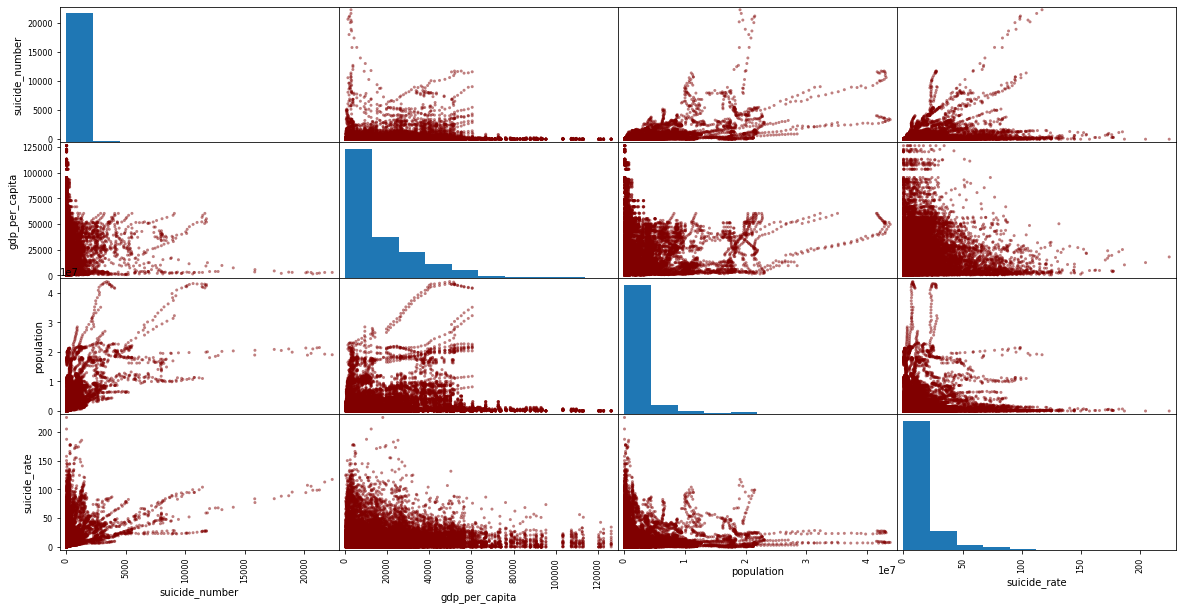

In [24]:
plt.figure(figsize=(20,10))
attributes = ['suicide_number','gdp_per_capita', 'population', 'suicide_rate', 
              'gdp_for_year']
scatter_matrix(df[attributes],color='maroon', figsize=(20,10))
plt.show()

# USA Analyze and visualise 
- We will make analysis on the available data for the USA only to see if it exhibits the same behaviour as the total dataset. 

## Check The Difference Between Male and Female Suicide Rates(USA)

In [25]:
df_usa = df[df.country == 'United States']
df_usa.head()

,country,year,sex,age,suicide_number,population,suicide_rate,country_year,HDI_for_year,gdp_for_year,gdp_per_capita,generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X


In [26]:
df_usa.columns = ['country', 'year', 'sex', 'age', 'suicide_number', 'population', 'suicide_rate', 'country_year', 'HDI_for_year',
                'gdp_for_year', 'gdp_per_capita', 'generation']

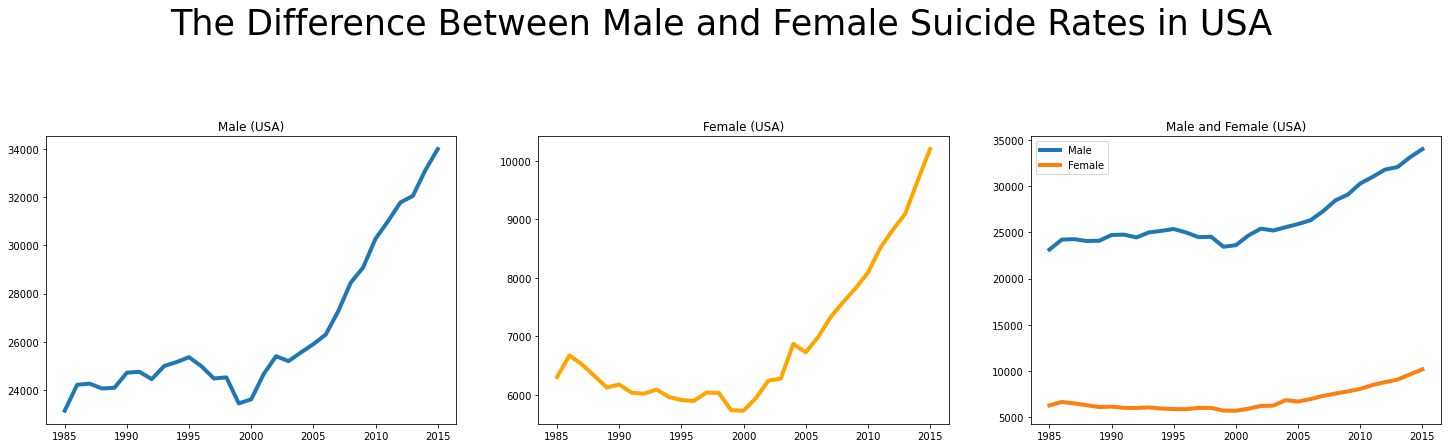

In [27]:
df_usa_men = df_usa[df_usa.sex == 'male']
df_usa_women = df_usa[df_usa.sex == 'female']
plt.figure(figsize=(25,18))
ax1 = plt.subplot(331)
ax1.title.set_text('Male (USA)')
plt.plot(df_usa_men[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
ax2 = plt.subplot(332)
ax2.title.set_text('Female (USA)')
plt.plot(df_usa_women[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4,color='orange')
ax3 = plt.subplot(333)
ax3.title.set_text('Male and Female (USA)')
plt.plot(df_usa_men[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_usa_women[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.legend(["Male","Female"])
plt.suptitle('The Difference Between Male and Female Suicide Rates in USA', fontsize=35)
plt.show()

- We also discovered that male suicide rates are higher than female suicide rates, regardless of age. 

- Also, we discovered that, contrary to preliminary findings, the suicide rate has been steadily increasing since the year 2000. 


## Check The Suicide Rates and Group Age Relationship (USA)

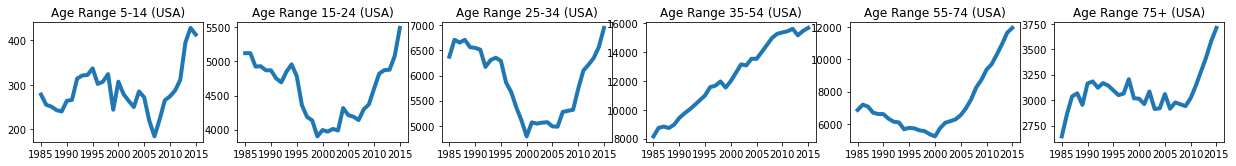

In [28]:
df_usa_age_5_14 = df_usa[df_usa.age == '5-14 years']
df_usa_age_15_24 = df_usa[df_usa.age == '15-24 years']
df_usa_age_25_34 = df_usa[df_usa.age == '25-34 years']
df_usa_age_35_54 = df_usa[df_usa.age == '35-54 years']
df_usa_age_55_74 = df_usa[df_usa.age == '55-74 years']
df_usa_age_75 = df_usa[df_usa.age == '75+ years']

plt.figure(figsize=(25,18))
ax1= plt.subplot(771)
ax1.title.set_text('Age Range 5-14 (USA)')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_usa_age_5_14[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax2 = plt.subplot(772)
ax2.title.set_text('Age Range 15-24 (USA)')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_usa_age_15_24[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax3 = plt.subplot(773)
ax3.title.set_text('Age Range 25-34 (USA)')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_usa_age_25_34[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax4 = plt.subplot(774)
ax4.title.set_text('Age Range 35-54 (USA)')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_usa_age_35_54[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
#####################
ax5 = plt.subplot(775)
ax5.title.set_text('Age Range 55-74 (USA)')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_usa_age_55_74[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
######################
ax6 = plt.subplot(776)
ax6.title.set_text('Age Range 75+ (USA)')
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_usa_age_75[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
#####################

plt.show()

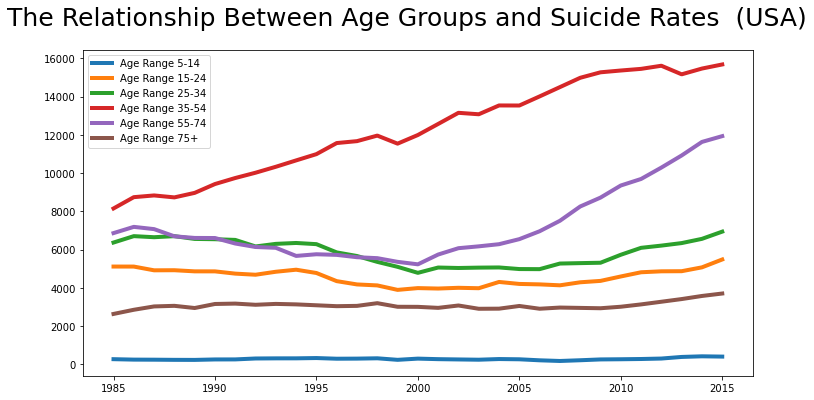

In [29]:
plt.figure(figsize=(12,6))
plt.xticks(np.arange(1985, 2016, 5))
plt.plot(df_usa_age_5_14[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_usa_age_15_24[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_usa_age_25_34[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_usa_age_35_54[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_usa_age_55_74[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)
plt.plot(df_usa_age_75[['year','suicide_number']].groupby(['year']).sum(),linewidth = 4)

plt.legend(["Age Range 5-14","Age Range 15-24","Age Range 25-34","Age Range 35-54","Age Range 55-74","Age Range 75+"])
plt.suptitle('The Relationship Between Age Groups and Suicide Rates  (USA)', fontsize=25)
plt.show()

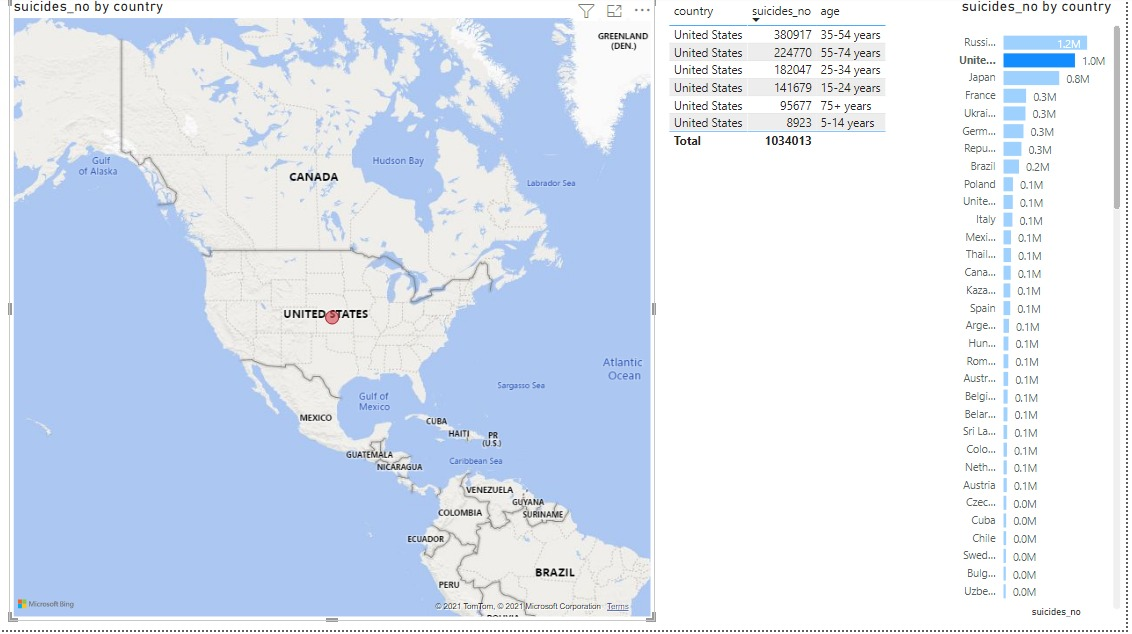

In [30]:
x2=df_usa.groupby('age', as_index=False)['suicide_number'].sum().sort_values(by='suicide_number', ascending=True)
x2.head(6)

,age,suicide_number
3,5-14 years,8923
5,75+ years,95677
0,15-24 years,141679
1,25-34 years,182047
4,55-74 years,224770
2,35-54 years,380917


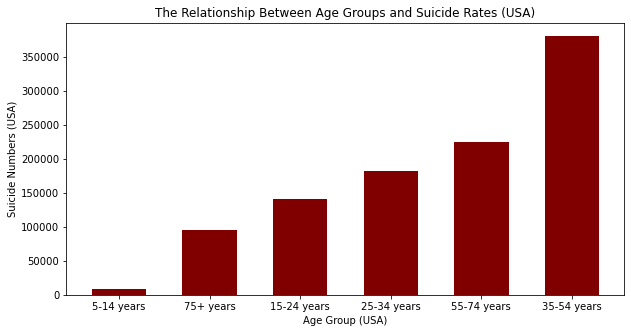

In [31]:
x=x2['age']
y=x2['suicide_number']
plt.figure(figsize=(10,5))
plt.bar(x,y,color ='maroon',width = 0.6)
plt.xlabel('Age Group (USA)')
plt.ylabel('Suicide Numbers (USA)')
plt.title('The Relationship Between Age Groups and Suicide Rates (USA)')
plt.show()

- We discovered the same three notes that we discovered on statistics on the entire dataset during our analysis of USA data.
- 1-the highest Suicide rate in age range 35-54 and then 55-74 and then 25-34
- 2-The lowest Suicide rate in age range 5-14 and then +75 and then 15-24
- 3-But We found the suicide rate has been steadily increasing since the year 2000, and this is a very critical problem faced the USA Community

## The Suicide Rates and Generation Relationship (USA)

In [32]:
generation =  df_usa.groupby('generation', as_index=False)['suicide_number'].sum().sort_values(by='suicide_number', ascending=True)
#generation 

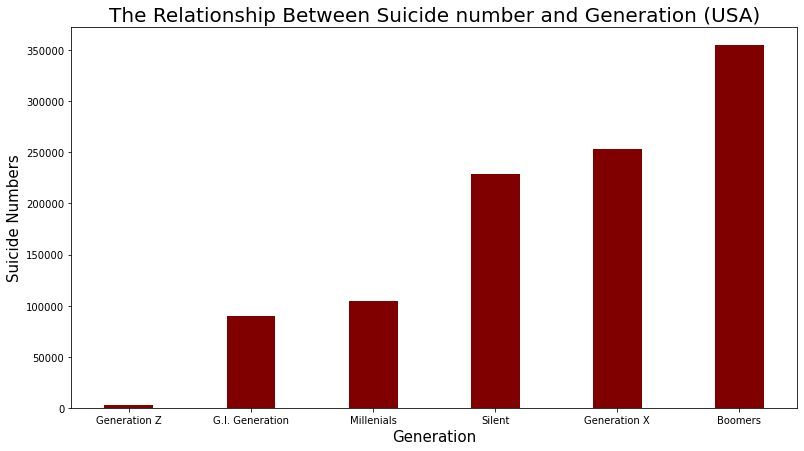

In [33]:
x1=generation['generation']
y1=generation['suicide_number']
plt.figure(figsize=(13,7))
plt.bar(x1,y1,color ='maroon',width = 0.4)
plt.xlabel('Generation', fontsize=15)
plt.ylabel('Suicide Numbers', fontsize=15)
plt.title('The Relationship Between Suicide number and Generation (USA)', fontsize=20)
plt.show()

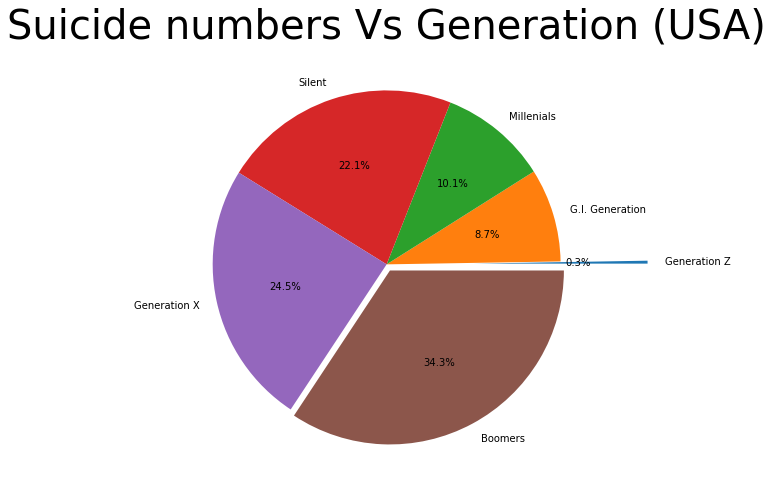

In [34]:
plt.figure(figsize=(8,8))
plt.title('Suicide numbers Vs Generation (USA)', fontsize=40)
plt.pie(generation.suicide_number, explode =(0.5, 0, 0, 0, 0, 0.04), labels=generation.generation, autopct='%1.1f%%')
plt.show()

- We found also from the Above graphs That the Boomers generation has the highest suicide rate, and the Generation Z has the lowest suicide rate, and this result was confirmed when we checked this point across the entire dataset. 

## Check which years had the heighest and lowest suicide rate.

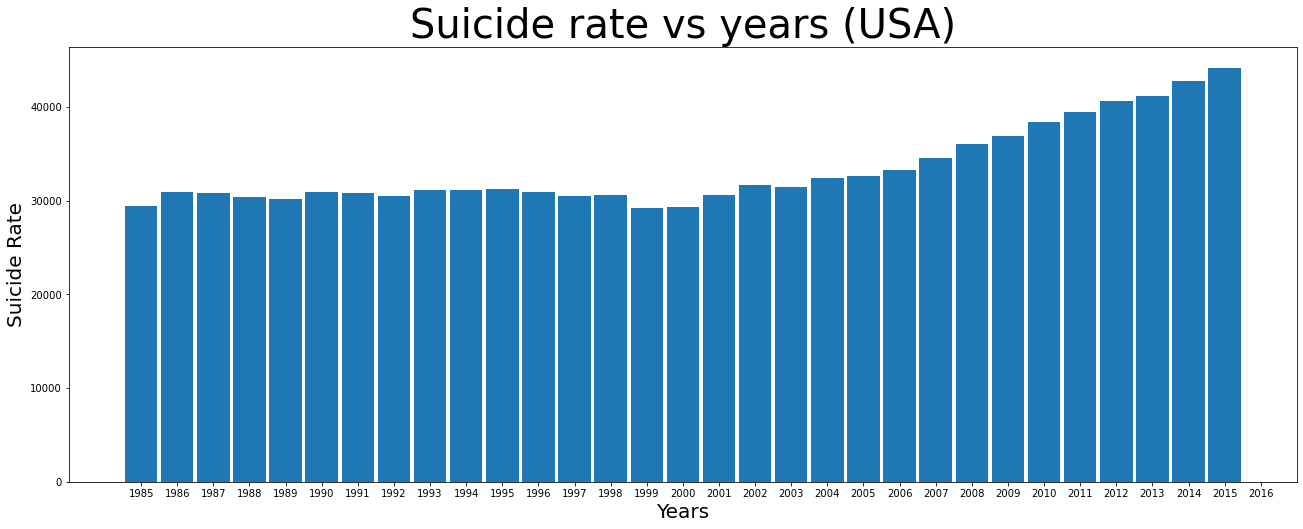

In [35]:
years =  df_usa.groupby('year', as_index=False)['suicide_number'].sum().sort_values(by='suicide_number', ascending=True)
#years 
x2=years['year']
y2=years['suicide_number']
plt.figure(figsize=(22,8))
plt.xticks(np.arange(1985, 2017, 1))
plt.bar(x2,y2,width=0.9)
plt.title('Suicide rate vs years (USA)', fontsize=40)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Suicide Rate", fontsize=20)
plt.show()

- We discovered that the suicide rate in the USA increases gradually every year.  

# USA Analysis Conclusion:
- We discovered that the behaviour of the suicide rate in the United States is almost similar to the behaviour of the suicide rate in all countries data, but the main difference is that the suicide rate has been steadily increasing since the year 2000, and this is a very serious problem facing the United States community. 

- Our Opinion:
- Our Recommendation:

## Step 4: Cleaning and Processing and Splitting

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   sex             27820 non-null  object 
 3   age             27820 non-null  object 
 4   suicide_number  27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country_year    27820 non-null  object 
 8   HDI_for_year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


We found HDI_for_year column is almost null so we must delete it before proceeding with our statistics operation. 
and also country_year columns isn't useful for us

In [37]:
df = df.drop(['HDI_for_year'], axis = 1)


In [38]:
df = df.drop(['country_year'], axis = 1)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicide_number', 'population',
       'suicide_rate', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

In [39]:
df.dtypes

country            object
year                int64
sex                object
age                object
suicide_number      int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation         object
dtype: object

In [40]:
object_data=df.select_dtypes(include="object")
le = preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
               object_data.iloc[:,i]=le.fit_transform(object_data.iloc[:,i])
numerical_data=df.select_dtypes(exclude="object")
df=pd.concat([object_data,numerical_data],axis=1)
df.head()             

C:\Users\Ahmed Tuhamy\anaconda3\lib\site-packages\pandas\core\indexing.py:1783: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\Ahmed Tuhamy\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,country,sex,age,gdp_for_year,generation,year,suicide_number,population,suicide_rate,gdp_per_capita
0,0,1,0,726,2,1987,21,312900,6.71,796
1,0,1,2,726,5,1987,16,308000,5.19,796
2,0,0,0,726,2,1987,14,289700,4.83,796
3,0,1,5,726,1,1987,1,21800,4.59,796
4,0,1,1,726,0,1987,9,274300,3.28,796


In [41]:
df.dtypes

country             int32
sex                 int32
age                 int32
gdp_for_year        int32
generation          int32
year                int64
suicide_number      int64
population          int64
suicide_rate      float64
gdp_per_capita      int64
dtype: object

In [42]:
df.isnull().sum()

country           0
sex               0
age               0
gdp_for_year      0
generation        0
year              0
suicide_number    0
population        0
suicide_rate      0
gdp_per_capita    0
dtype: int64

In [43]:
X = df.drop('suicide_number',axis=1)
y = df['suicide_number']

In [44]:
X.head(2)

,country,sex,age,gdp_for_year,generation,year,population,suicide_rate,gdp_per_capita
0,0,1,0,726,2,1987,312900,6.71,796
1,0,1,2,726,5,1987,308000,5.19,796


In [45]:
y.head(2)

0    21
1    16
Name: suicide_number, dtype: int64

Check the Mathmatical correlation between the Suicide numbers and other Columns 

<AxesSubplot:>

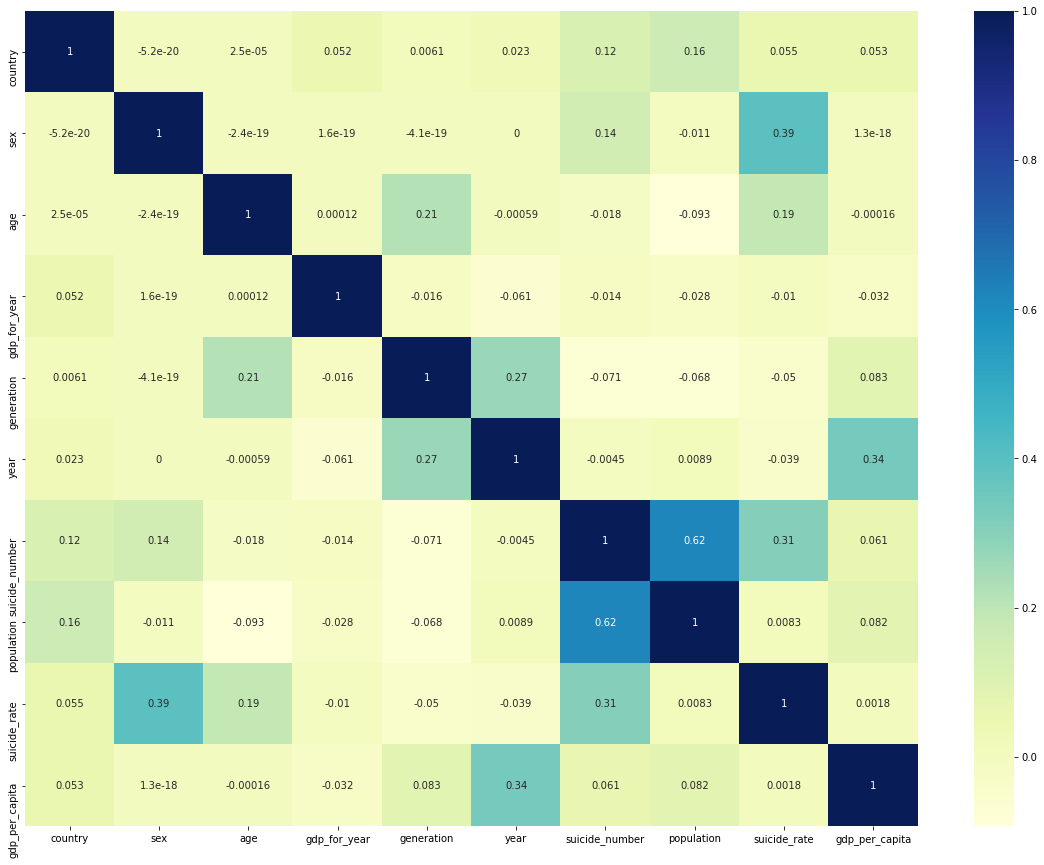

In [46]:
corr=df.corr()
plt.subplots(figsize=(20,15))
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap="YlGnBu")
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True, cmap="YlGnBu")

#### According to the graph above, 
All of the variables (country, sex, population, suicide rate, and gdp per capita) have a positive relationship with the suicide numbers, 
while the others (age, gdp for year, generation, and year) have a negative relationship with the suicide numbers. 

## Step 5: Building Predictive Model and Testing it

### Build Model 1 Linear Regression

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=60)

In [48]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
print(model.score(X_train,y_train))

0.46521706793522544


In [50]:
print(model.score(X_test,y_test))

0.5528546466935473


In [51]:
Y_=model.predict(X)

In [52]:
r2_value=r2_score(df[["suicide_number"]], Y_)
MSE_value=mean_squared_error(df[ "suicide_number"],Y_)

In [53]:
r2_value

0.4724340709313938

In [54]:
MSE_value

429259.9247438463

In [55]:
compare_real_pred=pd.DataFrame({"suicide_number":df["suicide_number"],"Predicted_suicide_number":Y_})
compare_real_pred

,suicide_number,Predicted_suicide_number
0,21,-23.712958
1,16,-80.476209
2,14,-120.711132
3,1,-119.726237
4,9,-68.652620
...,...,...
27815,107,340.699133
27816,9,-166.616108
27817,60,262.788080
27818,44,169.783103


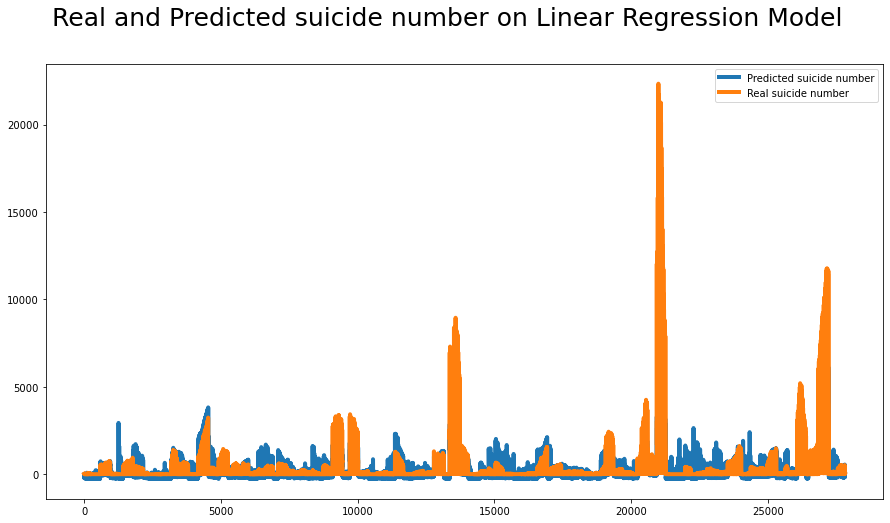

In [56]:
plt.figure(figsize=(15,8))
plt.plot(compare_real_pred[['Predicted_suicide_number']],linewidth = 4)
plt.plot(compare_real_pred[['suicide_number']],linewidth = 4)
plt.legend(["Predicted suicide number","Real suicide number"])
plt.suptitle('Real and Predicted suicide number on Linear Regression Model ', fontsize=25)
plt.show()

- According to the above graph and results, the accurate predicted values for linear regression model is 0.472, which is not good, 
And the error percentage is 429316.442, which is very bad, and the graph confirmed this result. 

### Build Model 2 Polynomial Regression

In [57]:
r2=[]
MSE=[]
degree=[1,2,3,4,5]
for i in degree :
    Input=[(('polynomial '),PolynomialFeatures(degree=i)),("mode",linear_model.LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(X,y) 
    Yhat1=pipe.predict(X)
    r2_value=r2_score(df[["suicide_number"]], Yhat1)
    r2.append(r2_value)
    MSE_value=mean_squared_error(df[ "suicide_number"], Yhat1)
    MSE.append (MSE_value)

In [58]:
r2

[0.4724519159252909,
 0.9999999811045427,
 0.9999948565345377,
 0.9710941267178194,
 0.9090322764154309]

In [59]:
MSE

[429245.4049647718,
 0.015374500415311586,
 4.185038258934204,
 23519.587422315224,
 74016.90675698109]

In [60]:
Input=[(('polynomial '),PolynomialFeatures(degree=2)),("mode",linear_model.LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,y)
Yhat1=pipe.predict(X)
compare_real_pred=pd.DataFrame({"suicide_number":df["suicide_number"],"Predicted_suicide_number":Yhat1})
compare_real_pred

,suicide_number,Predicted_suicide_number
0,21,20.997672
1,16,15.990130
2,14,13.992203
3,1,1.003249
4,9,8.997396
...,...,...
27815,107,107.191287
27816,9,8.986826
27817,60,59.935512
27818,44,43.955105


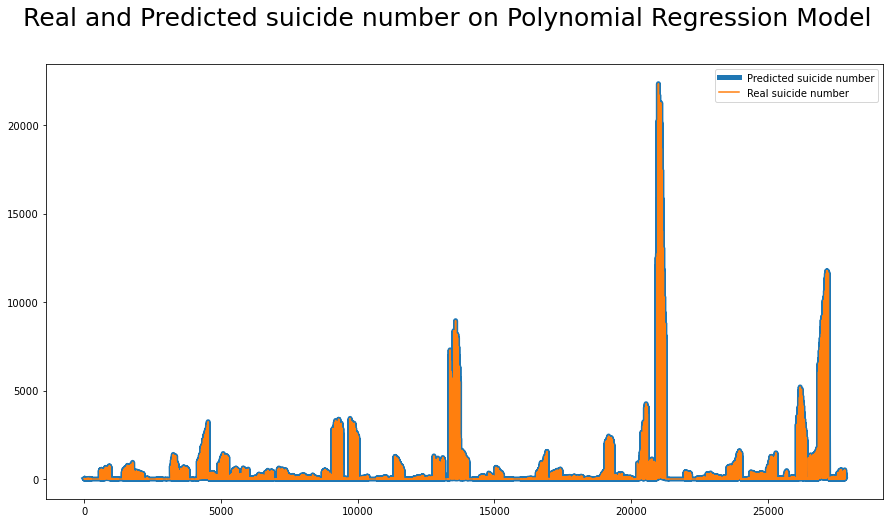

In [61]:
plt.figure(figsize=(15,8))
plt.plot(compare_real_pred[['Predicted_suicide_number']],linewidth = 5)
plt.plot(compare_real_pred[['suicide_number']])
plt.legend(["Predicted suicide number","Real suicide number"])
plt.suptitle('Real and Predicted suicide number on Polynomial Regression Model ', fontsize=25)
plt.show()

- According to the above graph and results, the accurate predicted values for Polynomial regression model is 0.99999998, we think it is very good, And the error percentage is 0.01537, and we think it is very good also , and the graph confirmed this result. 

### Build Model 3 Decision Tree Regression

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [63]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [64]:
print(model.score(X_train,y_train))

1.0


In [65]:
print(model.score(X_test,y_test))

0.9907744690241901


In [66]:
Y_=model.predict(X)

In [67]:
r2_value=r2_score(df[["suicide_number"]], Y_)

In [68]:
MSE_value=mean_squared_error(df[ "suicide_number"],Y_)

In [69]:
r2_value

0.9982413636592651

In [70]:
MSE_value

1430.9341480948958

In [71]:
compare_real_pred=pd.DataFrame({"suicide_number":df["suicide_number"],"Predicted_suicide_number":Y_})
compare_real_pred

,suicide_number,Predicted_suicide_number
0,21,21.0
1,16,16.0
2,14,14.0
3,1,1.0
4,9,9.0
...,...,...
27815,107,107.0
27816,9,9.0
27817,60,60.0
27818,44,44.0


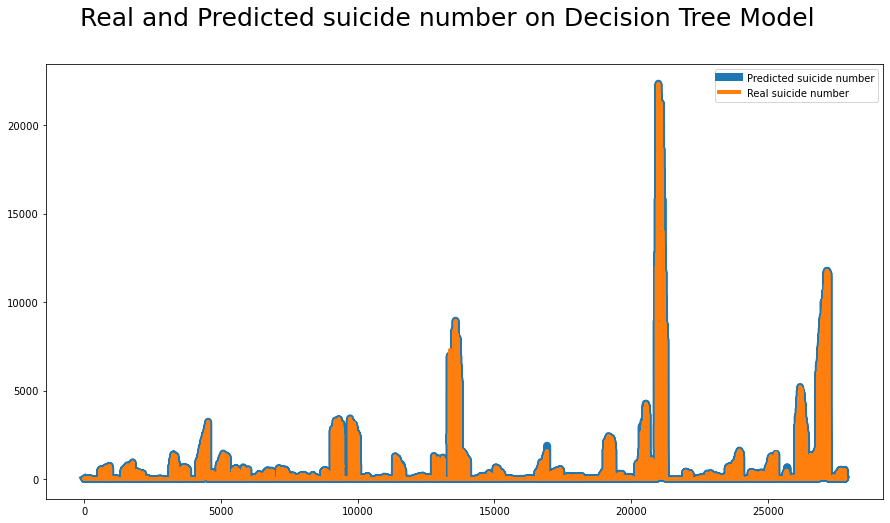

In [72]:
plt.figure(figsize=(15,8))
plt.plot(compare_real_pred[['Predicted_suicide_number']],linewidth = 8)
plt.plot(compare_real_pred[['suicide_number']],linewidth = 4)
plt.legend(["Predicted suicide number","Real suicide number"])
plt.suptitle('Real and Predicted suicide number on Decision Tree Model ', fontsize=25)
plt.show()

- According to the above graph and results, the accurate predicted values for Decision tree regression model is 0.9972, and i think it is good, but the error percentage is 1964.7, and we think it is not good, and the graph confirmed this result. 

### Build Model 4 Random Forest Regression

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [74]:
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [75]:
print(model.score(X_train,y_train))

0.9995793757462074


In [76]:
print(model.score(X_test,y_test))

0.9927490493692632


In [77]:
Y_=model.predict(X)

In [78]:
r2_value=r2_score(df[["suicide_number"]], Y_)
MSE_value=mean_squared_error(df[ "suicide_number"],Y_)

In [79]:
r2_value

0.9976745198490691

In [80]:
MSE_value

1892.152960567937

In [81]:
compare_real_pred=pd.DataFrame({"suicide_number":df["suicide_number"],"Predicted_suicide_number":Y_})
compare_real_pred

,suicide_number,Predicted_suicide_number
0,21,21.13
1,16,16.05
2,14,14.08
3,1,1.00
4,9,8.95
...,...,...
27815,107,106.87
27816,9,8.95
27817,60,59.38
27818,44,45.33


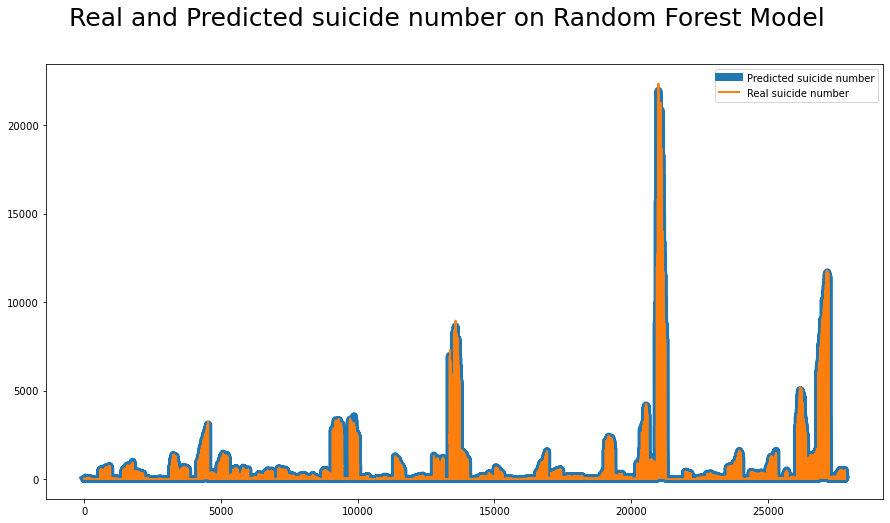

In [82]:
plt.figure(figsize=(15,8))
plt.plot(compare_real_pred[['Predicted_suicide_number']],linewidth = 8)
plt.plot(compare_real_pred[['suicide_number']],linewidth = 2)
plt.legend(["Predicted suicide number","Real suicide number"])
plt.suptitle('Real and Predicted suicide number on Random Forest Model ', fontsize=25)
plt.show()

- According to the above graph and results, the accurate predicted values for Random Forest regression model is 0.9973, we think it is good, but the error percentage is 2173.48995674335, and we think it isn't good, and the graph confirmed this result. 

### Build Model 5 Nearest Neighbors Regression

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [84]:
model = KNeighborsRegressor()

In [85]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [86]:
print(model.score(X_train,y_train))

0.5368975856438439


In [87]:
print(model.score(X_test,y_test))

0.2921048535589703


In [88]:
Y_=model.predict(X)

In [89]:
r2_value=r2_score(df[["suicide_number"]], Y_)
MSE_value=mean_squared_error(df[ "suicide_number"],Y_)

In [90]:
r2_value

0.46862989436059554

In [91]:
MSE_value

432355.2356017254

In [92]:
compare_real_pred=pd.DataFrame({"suicide_number":df["suicide_number"],"Predicted_suicide_number":Y_})
compare_real_pred

,suicide_number,Predicted_suicide_number
0,21,29.0
1,16,28.0
2,14,5.6
3,1,6.2
4,9,8.0
...,...,...
27815,107,522.2
27816,9,34.0
27817,60,347.6
27818,44,214.6


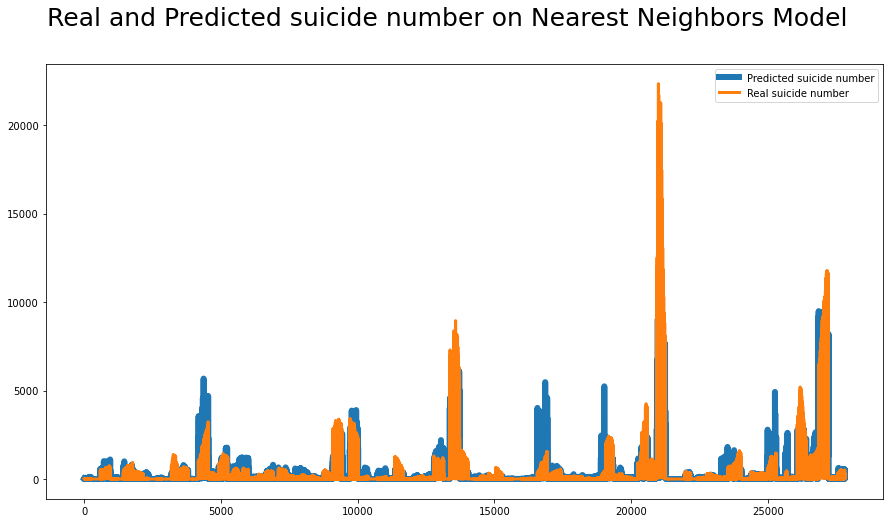

In [93]:
plt.figure(figsize=(15,8))
plt.plot(compare_real_pred[['Predicted_suicide_number']],linewidth = 6)
plt.plot(compare_real_pred[['suicide_number']],linewidth = 3)
plt.legend(["Predicted suicide number","Real suicide number"])
plt.suptitle('Real and Predicted suicide number on Nearest Neighbors Model ', fontsize=25)
plt.show()

- According to the above graph and results, the accurate predicted values for Nearest Neighbors regression model is 0.46862, we think it isn't good, and the error percentage is 432355.2, and we think it isn't good, and the graph confirmed this result. 

### Build Model 6 Neural System Regression

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

In [95]:
model = MLPRegressor()
model.fit(X_train,y_train)

MLPRegressor()

In [96]:
print(model.score(X_train,y_train))

0.3111526404988513


In [97]:
print(model.score(X_test,y_test))


0.3450949294809257


In [98]:
Y_=model.predict(X)

In [99]:
r2_value=r2_score(df[["suicide_number"]], Y_)
MSE_value=mean_squared_error(df[ "suicide_number"],Y_)

In [100]:
r2_value

0.3145902358069228

In [101]:
MSE_value

557691.3283912173

In [102]:
compare_real_pred=pd.DataFrame({"suicide_number":df["suicide_number"],"Predicted_suicide_number":Y_})
compare_real_pred

,suicide_number,Predicted_suicide_number
0,21,21.728296
1,16,20.299706
2,14,18.954072
3,1,-21.368016
4,9,17.987748
...,...,...
27815,107,319.665746
27816,9,2.698033
27817,60,236.726876
27818,44,223.710995


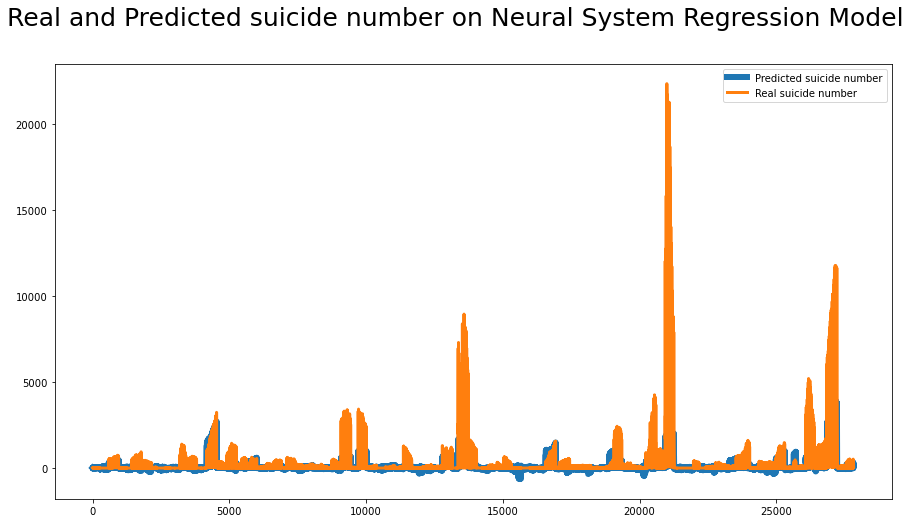

In [103]:
plt.figure(figsize=(15,8))
plt.plot(compare_real_pred[['Predicted_suicide_number']],linewidth = 6)
plt.plot(compare_real_pred[['suicide_number']],linewidth = 3)
plt.legend(["Predicted suicide number","Real suicide number"])
plt.suptitle('Real and Predicted suicide number on Neural System Regression Model ', fontsize=25)
plt.show()

- According to the above graph and results, the accurate predicted values for Neural system regression model is 0.3830, we think it isn't good, and the error percentage is 502019.4, and we think it isn't good, and the graph confirmed this result.

### We examined six predictive models and discovered that the second model (Polynomial Regression) provides the most accurate prediction as well as the lowest error percentages, hence we recommend using it to forecast the number of suicide cases.


# Step 6: Suicide Project Summary

### We can summarize our suicide dataset to five main points 
#### 1-We discovered from the graphs that: 
####   Observation Number 1 is Suicide Male numbers are higher than female numbers regardless of age

##### Our opinion is The suicide rate of males is higher than females due to:
Method lethality: Despite the suicide rate being higher in men, women typically have higher rates of suicidal ideation and behaviour than men (Cantor, 2000). The difference, therefore, seems to lie in mortality rates, which are lower in women than in men, suggesting that the difference may be in either intent or in the lethality of the method used (Canetto & Sakinofsky, 1998).Intent is generally not considered to be the reason for this discrepancy: although Rich et al., (1988) used psychological autopsy data to suggest that women are less intent on dying than men,corroborated this finding. Furthermore, Beautrais et al. (1996) found that the proportion of males and females who made a medically serious attempt was almost equal, but that twice as many women used non-violent methods. This suggests that the difference in suicide mortality rates between males and females is a result of method choice, rather than intent.

This difference in method choice is strongly supported by statistical evidence; Denning et al. (2000) stated that women use methods such as drug overdose and carbon monoxide poisoning, while men tend to use firearms and hanging.

Male suicide methods are often more violent, making them more likely to be completed before anyone can intervene.

Depression (help seeking): This suggests that the gender difference lies in help-seeking rather than in rates of depression itself, a premise supported by consistent reports that help-seeking behaviours for mental illness are less common in men than in women, even when experiencing similar levels of distress (Kessler, Brown, and Broman, 1981). Rickwood and Braithwaite (1994) noted that gender is one of the most consistent predictors of help-seeking behaviour, and research shows that men are more likely to agree that they would not seek professional therapy for depression or even seek help from their friends (Padesky & Hammen, 1981).

This could explain the discrepancy in suicide rates between males and females, as helping results in treatment, which is generally accepted as being more likely to alleviate depression than no treatment at all. Hence, men who do not seek help for depression are likely to suffer more severely due to a lack of treatment, which could result in an increased risk of suicide.

Responsibility: This factor can be related to family or work. When there's an economic downturn that results in increased unemployment, for example, there tends to be an associated increase in suicides, typically 18–24 months after the downturn. One 2015 study found that for every 1% increase in unemployment, there was a 0.79% increase in the suicide rate.

Having to worry more about finances or trying to find a job can exacerbate mental health issues for anyone. But there are elements of social pressure and identity crisis, too.
##### Our Recommendation is :
Communication: It’s too simplistic to say women are willing to share their problems and men tend to bottle them up. But it is true that, for generations, many societies have encouraged men to be "strong" and not admit they’re struggling.

It often starts in childhood. "We tell boys that 'boys don't cry'," says Colman O’Driscoll, former executive director of operations and development at Lifeline, an Australian charity providing 24-hour crisis support and suicide prevention services. "We condition boys from a very young age to not express emotions, because to express emotions is to be "weak."

Mara Grunau, executive director at the Centre for Suicide Prevention in Canada, points out that it’s how we talk to our children and how we encourage them to communicate about themselves too: "Mothers talk way more to their daughters than to their sons... and they share and identify feelings more," she says. "We almost expect women to be emotional."

Artificial intelligence (AI): Technology is presenting new options too. Not everyone might want to burden themselves with another person's problems, even over a helpline. But artificial intelligence – such as chatbots – might allow a vulnerable person to communicate and get the help they need without fear of judgement.

Awareness Campaign: Another strategy is to focus on the impact that a suicide has on loved ones. Calm’s campaign, Project 84, so named to represent the 84 men who die each week by suicide in the UK, stresses the devastation left behind. This can counteract the sense by some men that "it's the ‘right’ thing to take themselves out of the equation," Gunning says. He emphasises: "Staying is always an option."

Non-Violence: Other solutions have to do with simply making suicides more difficult to complete. After barriers were installed on the Clifton suspension bridge in Bristol, England,
#### Observation number 2 is that the male and female suicide rates began to fall in 2005 and reached a low point in 2016.

#### 2-We discovered from the graphs that: 
#### Observation Number 1 is the highest Suicide rate in age range 35-54 and then 55-74 and then 25-34
##### Our opinion is Young adults aged 18 to 25 are at higher risk for suicidal thoughts and attempts than other age groups. However, adults aged 35 to 64 have higher rates of death from suicide than other age groups due to:

(i) Older adults tend to plan suicide more carefully. They are also more likely to use more lethal methods.

(ii) Grief over lost loved ones

(iii) Chronic illness and pain

(iv) Cognitive impairment

(v) Financial troubles 

##### Our Recommendation is :
The National Suicide Prevention Lifeline outlines five action steps you can take if you know an older adult who is thinking about suicide.

(i) Ask: Don’t be afraid to be direct with the person at risk. Ask questions like, "Are you thinking about suicide?" and "How can I help you?" to initiate a conversation in a supportive and unbiased way. Be sure to listen carefully to their answers and acknowledge their emotional pain.

(ii)Be there: If you’re able to, be physically present for the person in order to ease feelings of isolation and provide a sense of connectedness. If a face-to-face visit is not possible, be there for them via phone or video call. Work with the individual to identify others who may be willing to lend their help. Be sure not to make any promises that you are unable to keep. 

(iii) Keep them safe: Find out if the person has already made any attempts on their life. Do they have a specific plan or timing in mind? Do they have access to their planned method of self-harm? Learning the answers to these questions can help you understand whether this individual is in immediate danger. In general, the more detailed a person’s suicide plan is, the higher their risk.

(iv) Help them connect: If someone in your life is thinking about suicide, it’s important for them to establish a support system they can rely on now and in future moments of crisis.

(v) Follow up: Studies have shown that following up can reduce suicide-related deaths in high-risk populations. Once you've had an initial conversation with the vulnerable person and helped them establish a support network, make sure to check in. This can be done with a quick phone call, text message, or even a card.

#### Observation Number 2 is the lowest Suicide rate in age range 5-14 and then +75 and then 15-24
##### Our opinion is :
Suicide around the age of 5 is hard to find due to the fact that they don't have responsibilities or reasons to take their life. Suicide within this age range can be caused by childhood violence, mental disorders, sexual harassment, etc. Most literature (including this mini review) on youth suicide refers to school-age children (7–12 years) and adolescents (13–20 years). These young people are by nature vulnerable to mental health problems, especially during the years of adolescence (13). This period in life is characterised by movement, changes, and transitions from one state into another, in several domains at the same time. Young people have to make decisions about important concrete directions in life, for example, school, living situation, peer group.
For older adults (75+), sucide is low among them. Sucide can only occur and be caused by loliness, illness, sickness, etc.
Other more transient factors that reflect an imminent risk of suicide crisis include unbearable mental pain and related experiences of depression and hopelessness, which may lead to a suicidal state of mind.

##### Our Recommendation is :
They must address new challenges with regard to building their own identity, developing self-esteem, acquiring increasing independence and responsibility, and building new love.
More awareness, care, and love given to adults 75+

#### Observation Number 3 suicide rate decreased quickly after 2015
##### Our opinion is : 
Over the 20-year period (1996–2015), there was a statistically significant decrease in the rate of suicide (22.3%) decrease, from 14.2 per 100,000 in 1996 to 11.0 per 100,000 in 2015).
    

#### 3-We found from the Above graphs That the Boomers generation has the highest suicide rate 33.9%, and the Generation Z has the lowest suicide rate 0.2%.

##### Our opinion is : 

- Boomers

It has long held true that elderly people have higher suicide rates than the overall population. The Boomers had higher suicide rates than earlier generations; the confluence of that with the fact that they are now beginning to grow old, when the risk traditionally goes up is worrisome.

How did a generation that started out with so much going for it end up so despondent in midlife? It could be that those very advantages made it harder to cope with setbacks, said Barry Jacobs, director of behavioural sciences at the Crozer-Keystone Family Medicine Residency Program in Pennsylvania.

"There was an illusion of choice" — where people thought they’d be able to re-create themselves again and again, he said. "These people feel a greater sense of disappointment because their expectations of leading glorious lives didn’t come to fruition."

Instead, compared with their parents’ generation, boomers have higher rates of obesity, prescription and illicit drug abuse, alcoholism, divorce, depression, and mental disorders. As they age, many add to that list of chronic illness, disabilities, and the strains of caring for their parents and for adult children who still depend on them financially. Boomers have struggled more with existential questions of purpose and meaning.

- Generation Z

Generation Z has the lowest suicide rate because they are young and have fewer responsibilities and disappointments in life. Although Generation Z has the highest depression rate and mental instability,

According to a report, Generation Z (which is the current generation) is significantly more likely (about 27%) than other generations to report their mental health as poor. However, at the same time, they are 37% more likely to receive mental health treatment compared to other generations, reducing the attempts at suicide.
##### Our Recommendation is :
- Technology

Technology has developed a way to reduce and dictate sucide treats through the use of a machine learning model that would help us find out the chances of a particular individual resorting to suicide in the future.

- Communication

These factors can be used to help both generations avoid attempting and also reduce the rate of attempts in society. To help individuals dealing with the thought of suicide.

#### 4-According to the graph, the four countries with the highest suicide rates are: [Russian Federation,United States,Japan,France]

##### Our opinion is : 
- The suicide rate in these countries are high because of

I. Financial pressure
II. Isolating technology
III. Historical practices

##### Our Recommendation is to reduce the rate of these factors.

#### And the bottom four countries are as follows: [Dominica,Saint Kitts and Nevis,San Marino,Antigua and Barbuda]
##### Our opinion is :
These countries have lower suicide rates because they have less financial pressure, isolating technology, violence, and historical practices.
##### Our Recommendation is :
Creation of awareness to maintain the low rate of suicide in these countries.
#### 5-USA Analysis Conclusion:
- We discovered that the behaviour of the suicide rate in the United States is almost similar to the behaviour of the suicide rate in all countries data, but the main difference is that the suicide rate has been steadily increasing since the year 2000, and this is a very serious problem facing the United States community. 

##### - Our Opinion:

##### - Our Recommendation:  

##### 6-We also build model can help us to preidict the numbers of suicide victimes 
by knowing some information like the country,age,gender,gdp_for_year,generation,year,population,suicide_rate,gdp_per_capita
and We examined six predictive models and discovered that the second model (Polynomial Regression) provides the most accurate prediction 
as well as the lowest error percentages, hence we recommend using it to forecast the number of suicide cases. 